In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
from matplotlib.patches import Circle
import os
import pickle
from scipy.stats import mannwhitneyu, ttest_ind, kruskal, f_oneway
from statannotations.Annotator import Annotator
from itertools import combinations
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import clear_output, display
import sys
sys.path.append('../scripts') 
from functions import *
from config import nutrient_info, conversion_factors
%load_ext autoreload
%autoreload 2

In [2]:
df_food = pd.read_csv('../data/df_food_filtered_with_food_group.csv')

C:\Users\Sophie\AppData\Local\Temp\ipykernel_20972\1199098672.py:1: DtypeWarning: Columns (2,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_food = pd.read_csv('../data/df_food_filtered_with_food_group.csv')


In [3]:
df_food_scaled = pd.read_csv('../data/df_food_scaled.csv')

C:\Users\Sophie\AppData\Local\Temp\ipykernel_20972\2711278687.py:1: DtypeWarning: Columns (1,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_food_scaled = pd.read_csv('../data/df_food_scaled.csv')


In [4]:
threshold_value_qi = threshold_median_iqr(df_food_scaled, 'QI', factor=4)
threshold_value_di = threshold_median_iqr(df_food_scaled, 'DI', factor=4)

print(f"Outlier threshold for QI: {threshold_value_qi:.2f}")
print(f"Outlier threshold for QI: {threshold_value_di:.2f}")


Outlier threshold for QI: 8.45
Outlier threshold for QI: 3.54


In [5]:
qualifying_nutrients = {nutr: info for nutr, info in nutrient_info.items() if info['type'] == 'qualifying'}
disqualifying_nutrients = {nutr: info for nutr, info in nutrient_info.items() if info['type'] == 'disqualifying'}

In [6]:
df_food_clean_outliers, threshold_value_qi = remove_outliers(df_food_scaled, 'QI', factor=4)
df_food_clean_outliers, threshold_value_qi = remove_outliers(df_food_clean_outliers, 'DI', factor=4)


In [7]:
df_food_clean_outliers.to_csv('../data/df_food_clean_outliers.csv', index=False)

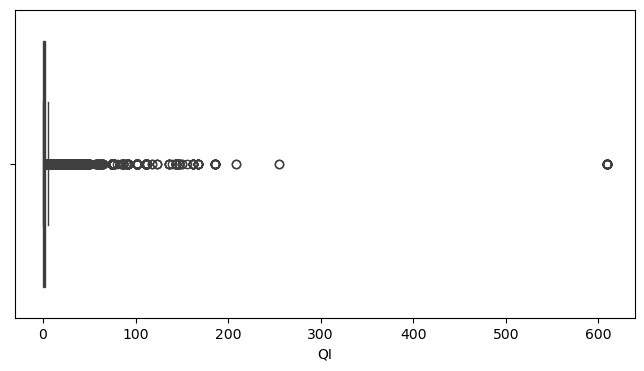

In [8]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_food_scaled['QI'])
plt.show()

In [9]:
for i in qualifying_nutrients:
    print(i, df_food_scaled.drop_duplicates('combined_name')[f'{i}_ratio'].describe().loc["max"].round())

folate_eaten 2.0
niacin_eaten 4.0
pantothenic_acid_eaten 63.0
vitamin_b2_eaten 166.0
vitamin_b1_eaten 208.0
all_trans_retinol_equivalents_activity_eaten 10.0
vitamin_b12_eaten 27.0
vitamin_b6_eaten 188.0
vitamin_c_eaten 10.0
vitamin_d_eaten 3.0
vitamin_e_activity_eaten 25.0
calcium_eaten 3.0
iron_eaten 55.0
magnesium_eaten 4.0
phosphorus_eaten 2.0
potassium_eaten 2.0
zinc_eaten 3.0
fiber_eaten 2.0
protein_eaten 4.0


In [10]:
for i in qualifying_nutrients:
    print(i, df_food_clean_outliers.drop_duplicates('combined_name')[f'{i}_ratio'].describe().loc["max"].round())

folate_eaten 1.0
niacin_eaten 3.0
pantothenic_acid_eaten 2.0
vitamin_b2_eaten 3.0
vitamin_b1_eaten 4.0
all_trans_retinol_equivalents_activity_eaten 2.0
vitamin_b12_eaten 9.0
vitamin_b6_eaten 27.0
vitamin_c_eaten 3.0
vitamin_d_eaten 2.0
vitamin_e_activity_eaten 3.0
calcium_eaten 3.0
iron_eaten 1.0
magnesium_eaten 4.0
phosphorus_eaten 2.0
potassium_eaten 1.0
zinc_eaten 3.0
fiber_eaten 2.0
protein_eaten 4.0


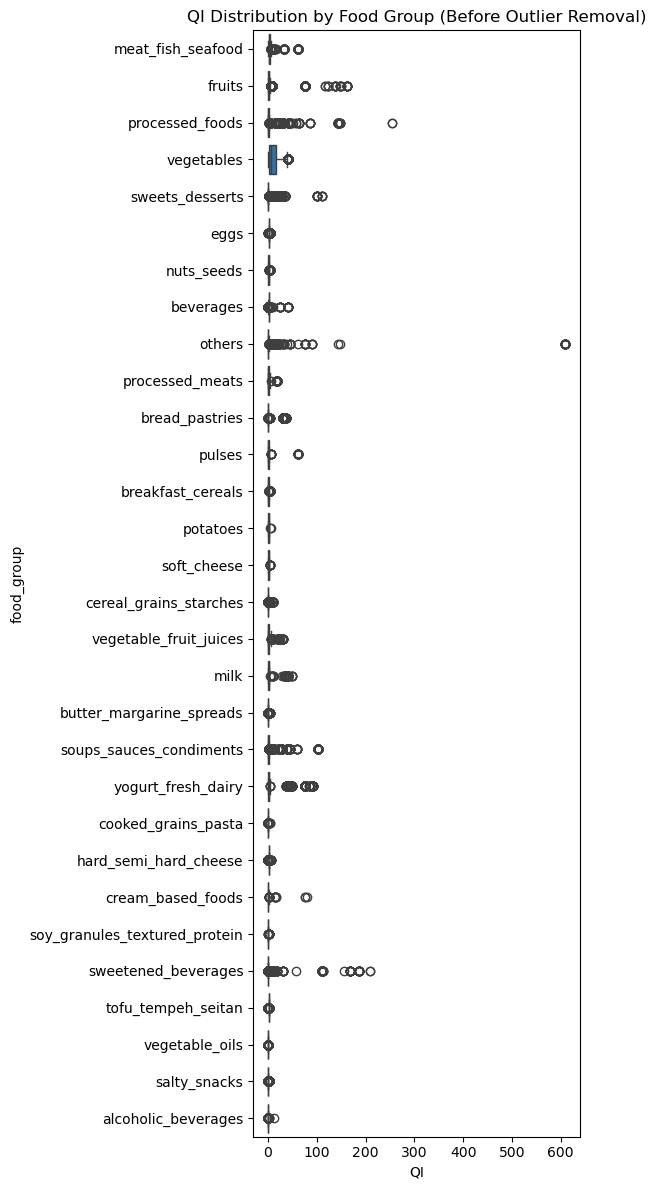

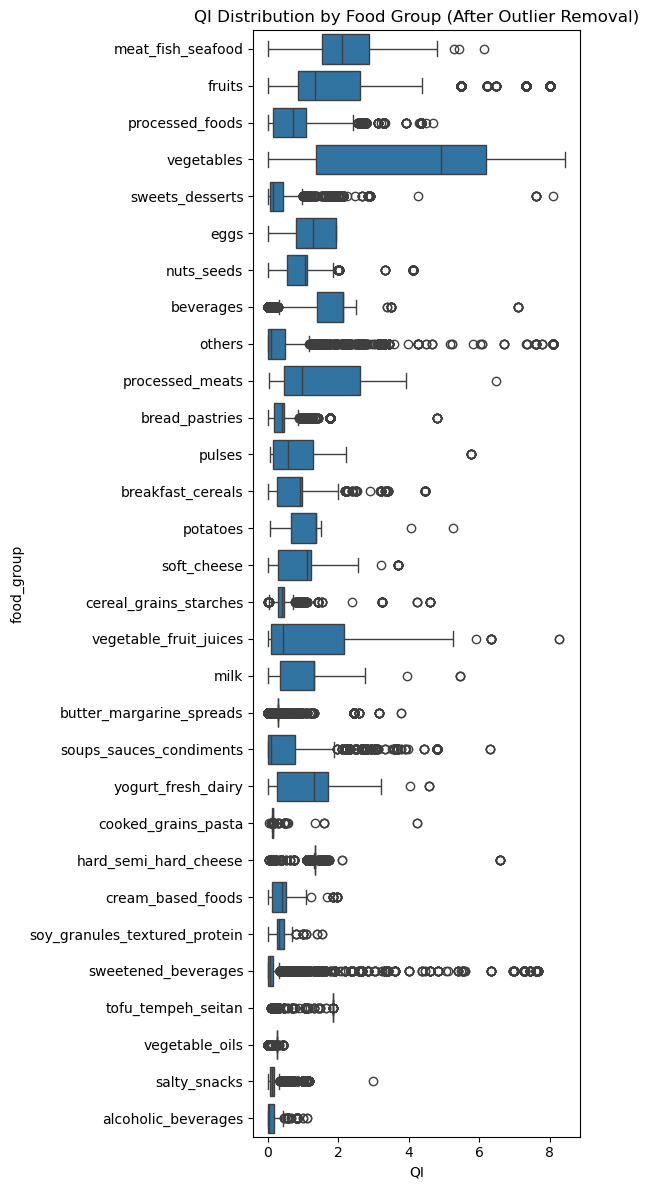

In [11]:
output_direction = "graphs"

plt.figure(figsize=(6, 12))
sns.boxplot(x='QI', y='food_group', data=df_food_scaled)
plt.title("QI Distribution by Food Group (Before Outlier Removal)")
plt.tight_layout()
output_path = os.path.join(output_direction, "QI Distribution by Food Group (Before Outlier Removal).png")
plt.savefig(output_path)
plt.show()


plt.figure(figsize=(6, 12))
sns.boxplot(x='QI', y='food_group', data=df_food_clean_outliers)
plt.title("QI Distribution by Food Group (After Outlier Removal)")
plt.tight_layout()
output_path = os.path.join(output_direction, "QI Distribution by Food Group (After Outlier Removal).png")
plt.savefig(output_path)
plt.show()

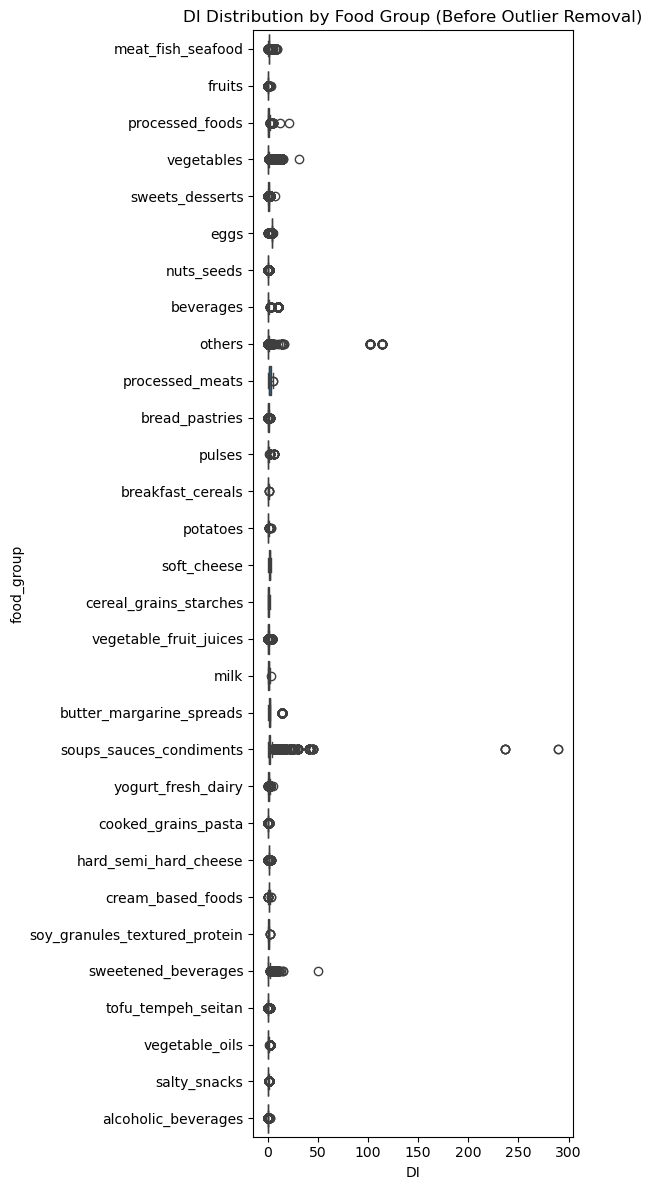

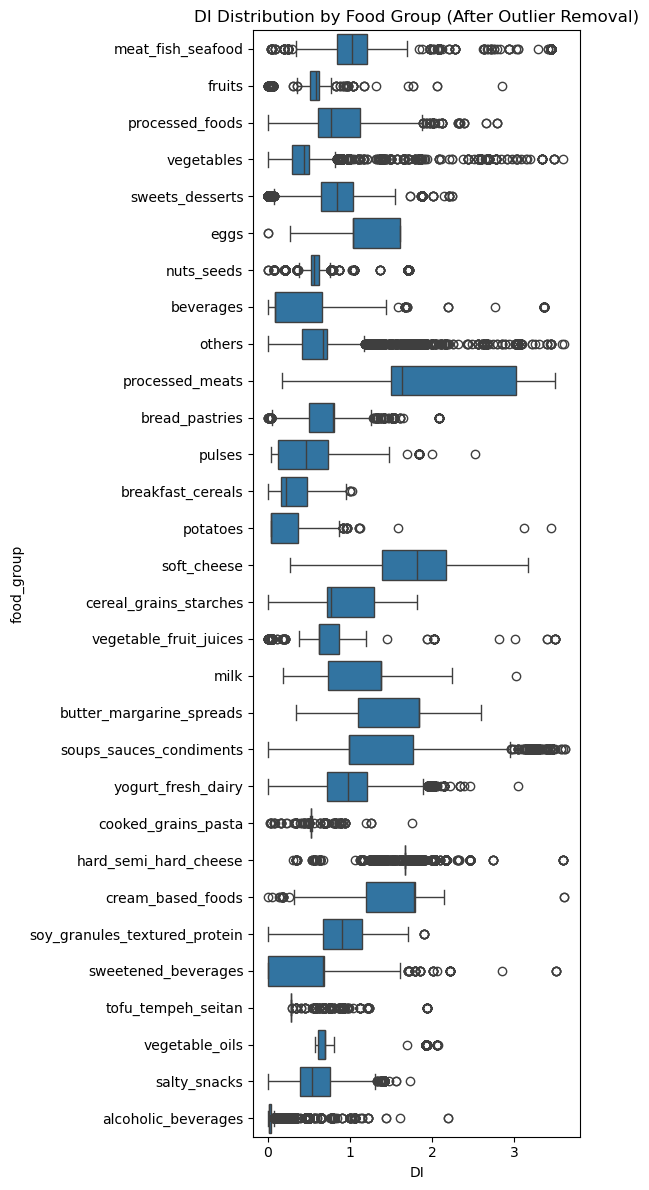

In [12]:
output_direction = "graphs"

plt.figure(figsize=(6, 12))
sns.boxplot(x='DI', y='food_group', data=df_food_scaled)
plt.title("DI Distribution by Food Group (Before Outlier Removal)")
plt.tight_layout()
output_path = os.path.join(output_direction, "DI Distribution by Food Group (Before Outlier Removal).png")
plt.savefig(output_path)
plt.show()


plt.figure(figsize=(6, 12))
sns.boxplot(x='DI', y='food_group', data=df_food_clean_outliers)
plt.title("DI Distribution by Food Group (After Outlier Removal)")
plt.tight_layout()
output_path = os.path.join(output_direction, "DI Distribution by Food Group (After Outlier Removal).png")
plt.savefig(output_path)
plt.show()

In [13]:
"""
for group in df_food_clean_outliers['food_group'].unique() :
    df_group = df_food_clean_outliers[df_food_clean_outliers['food_group'] == group]
    plt.figure(figsize=(5, 5))
    sns.boxplot(x='QI', data=df_group)
    plt.title(f"QI Distribution for {group.capitalize()} (After Outlier Removal)")
    plt.tight_layout()
    output_path = os.path.join(output_direction, f"{group}_QI_boxplot.png")
    plt.savefig(output_path)
    plt.show()
"""

'\nfor group in df_food_clean_outliers[\'food_group\'].unique() :\n    df_group = df_food_clean_outliers[df_food_clean_outliers[\'food_group\'] == group]\n    plt.figure(figsize=(5, 5))\n    sns.boxplot(x=\'QI\', data=df_group)\n    plt.title(f"QI Distribution for {group.capitalize()} (After Outlier Removal)")\n    plt.tight_layout()\n    output_path = os.path.join(output_direction, f"{group}_QI_boxplot.png")\n    plt.savefig(output_path)\n    plt.show()\n'

In [14]:
df_food_scaled[['QI', 'DI', 'NB', 'combined_name', 'food_group']].groupby('food_group').median(numeric_only=True).sort_values('QI')

,QI,DI,NB
food_group,,,
alcoholic_beverages,0.038127,0.007668,3.812709
sweetened_beverages,0.041806,0.664300,4.180602
others,0.105016,0.666667,5.474351
soups_sauces_condiments,0.117561,1.068889,6.402525
salty_snacks,0.121828,0.535766,10.000000
cooked_grains_pasta,0.135563,0.517566,9.358974
sweets_desserts,0.157373,0.852030,12.639102
vegetable_oils,0.245871,0.694173,6.645221
butter_margarine_spreads,0.284294,1.837749,15.794434


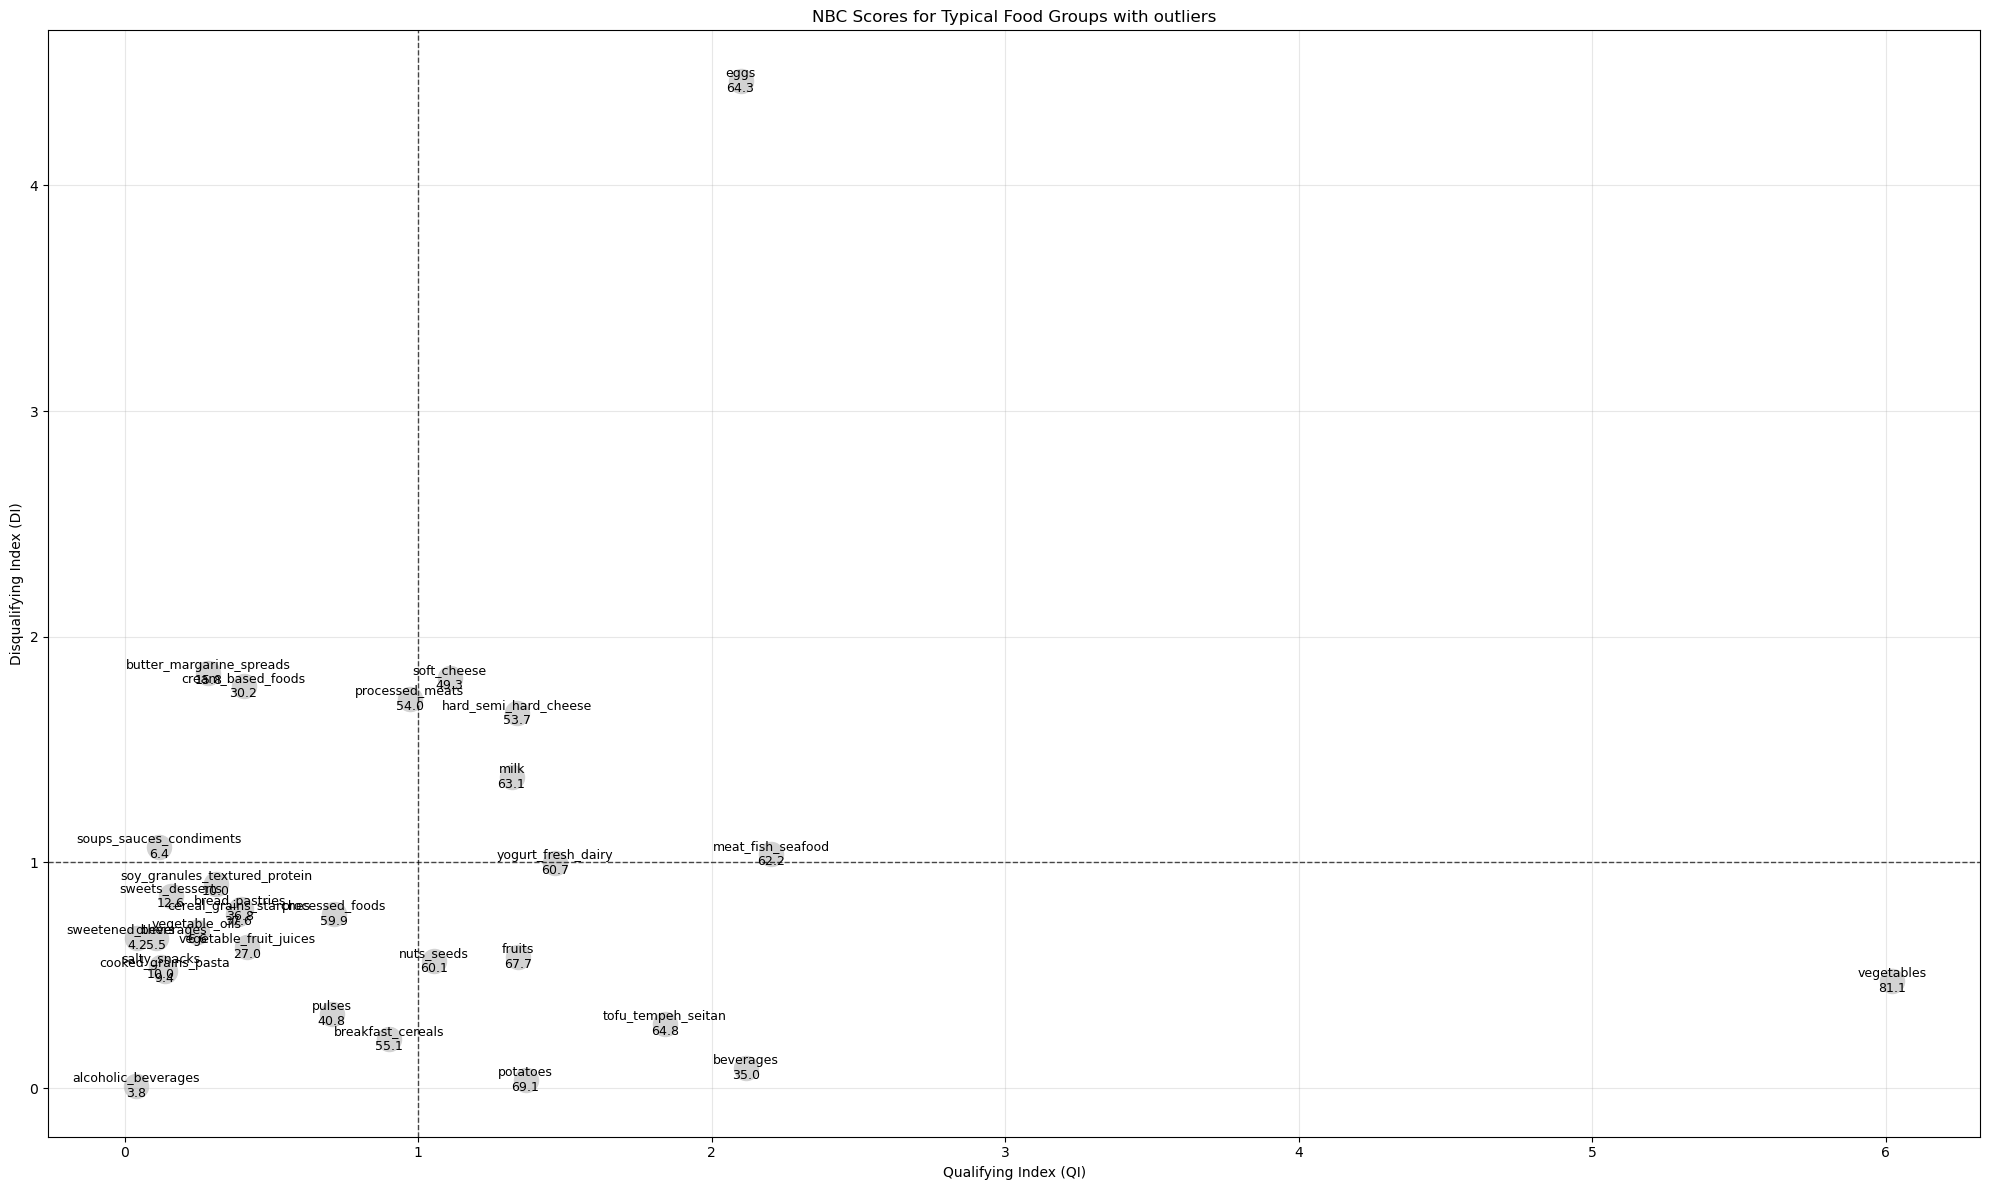

In [23]:
output_direction = "graphs"
grouped = df_food_scaled[['QI', 'DI', 'NB', 'food_group']].groupby('food_group').median(numeric_only=True).sort_values('QI')

plt.figure(figsize=(20, 12))
plt.scatter(grouped['QI'], grouped['DI'], s=300, color='lightgrey')

# Annotate each point with its food group name and median NB value
for fg, row in grouped.iterrows():
    x = row['QI']
    y = row['DI']
    nb = row['NB']
    plt.text(x, y, f"{fg}\n{nb:.1f}", ha='center', va='center', color='black', fontsize=9)

plt.axvline(x=1, color='black', linestyle='--', linewidth=1, alpha=0.7)
plt.axhline(y=1, color='black', linestyle='--', linewidth=1, alpha=0.7)

plt.xlabel("Qualifying Index (QI)")
plt.ylabel("Disqualifying Index (DI)")
plt.title("NBC Scores for Typical Food Groups with outliers")
plt.grid(True, alpha=0.3)
plt.tight_layout()

output_path = os.path.join(output_direction, "NBC Scores for Typical Food Groups with outliers.png")
plt.savefig(output_path)
plt.show()

In [ ]:
df_food_clean_outliers[['QI', 'DI', 'NB', 'combined_name', 'food_group']].groupby('food_group').median(numeric_only=True).sort_values('QI')

,QI,DI,NB
food_group,,,
alcoholic_beverages,0.038127,0.007668,3.812709
sweetened_beverages,0.051760,0.664300,5.000000
soups_sauces_condiments,0.075155,0.987477,6.262024
others,0.079190,0.666667,5.000000
salty_snacks,0.121828,0.535766,10.000000
cooked_grains_pasta,0.135563,0.517566,9.358974
sweets_desserts,0.153995,0.843364,10.223075
vegetable_oils,0.245871,0.694173,6.645221
butter_margarine_spreads,0.284294,1.837749,15.794434


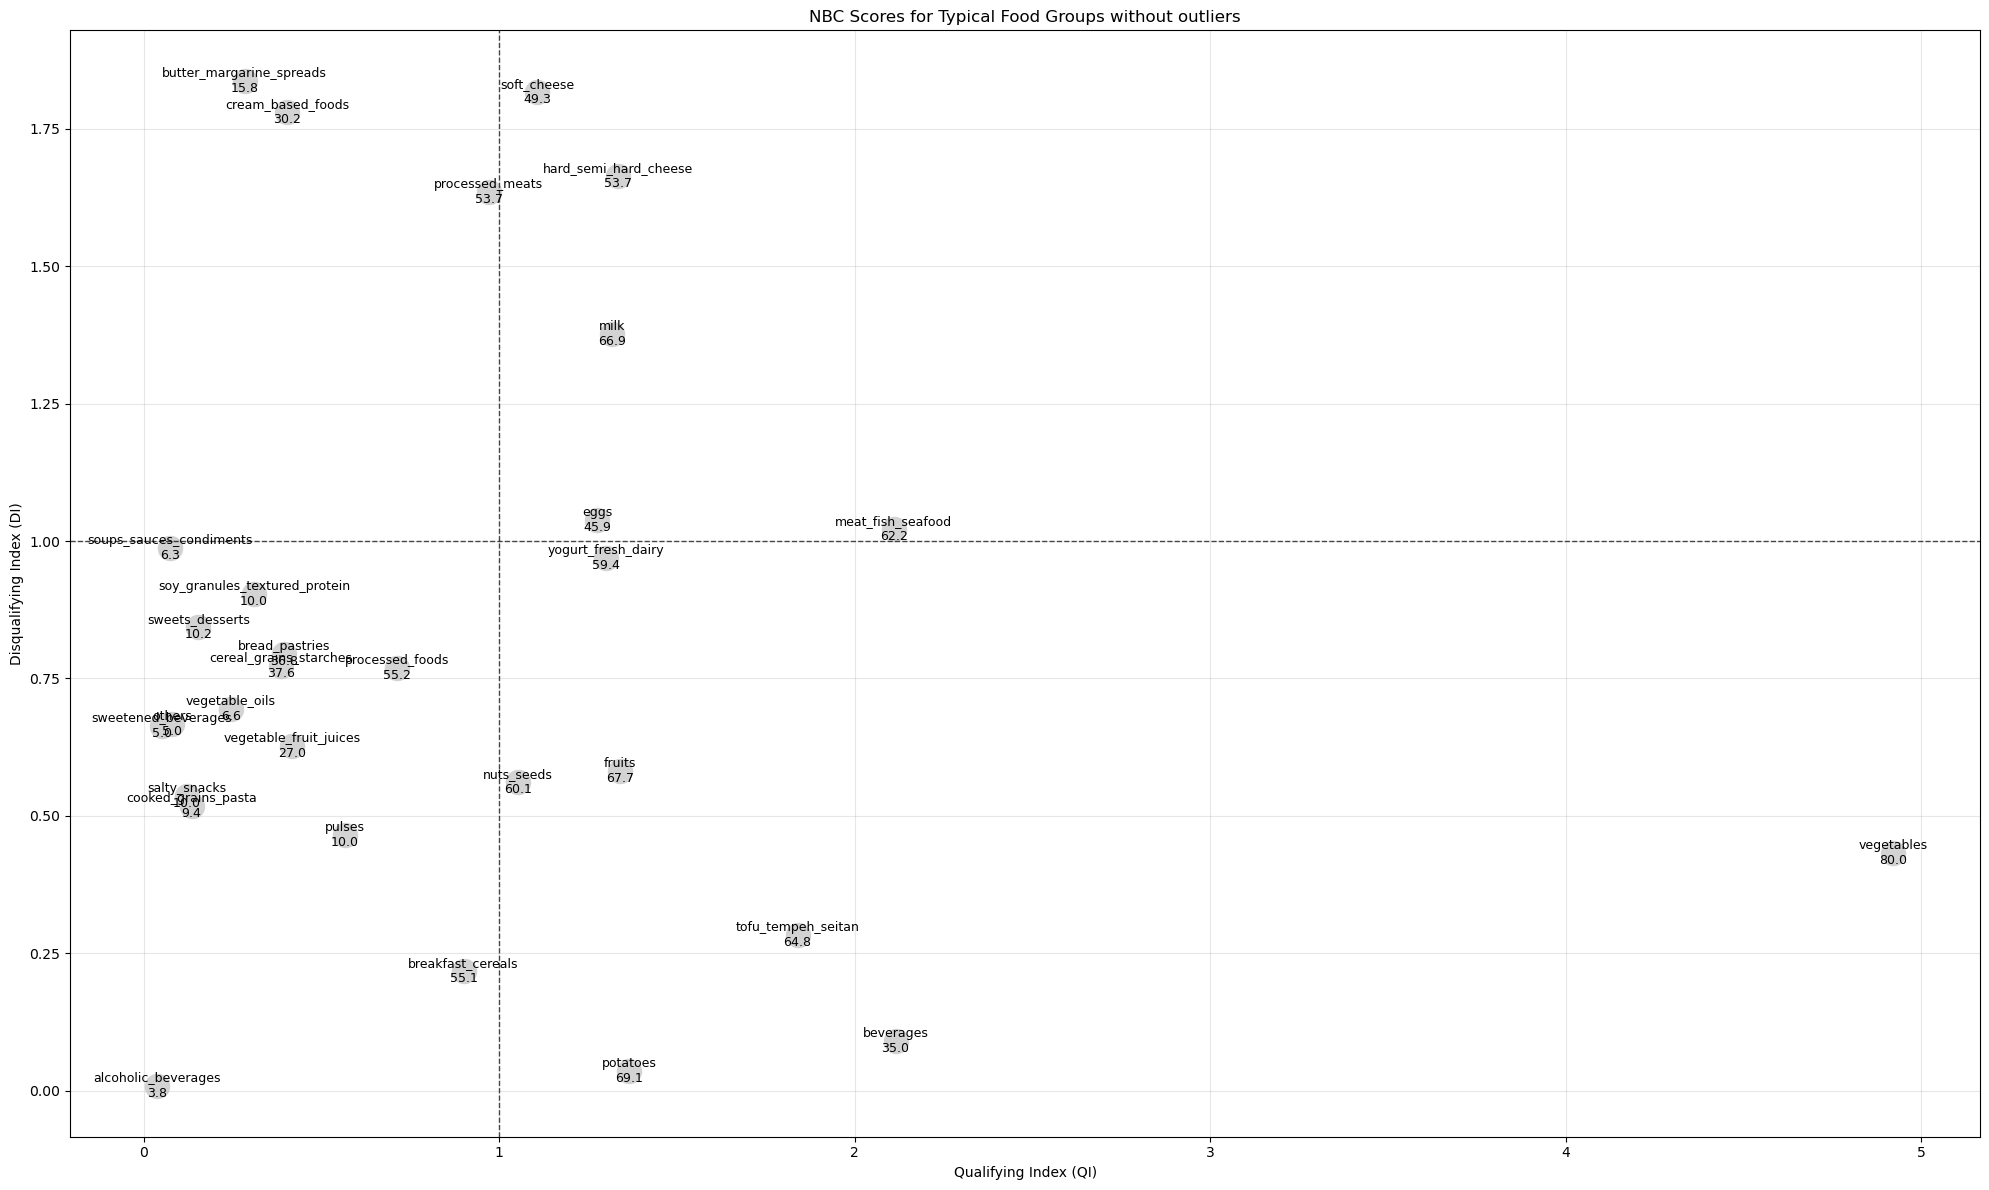

In [24]:
grouped = df_food_clean_outliers[['QI', 'DI', 'NB', 'food_group']].groupby('food_group').median(numeric_only=True).sort_values('QI')

plt.figure(figsize=(20, 12))
plt.scatter(grouped['QI'], grouped['DI'], s=300, color='lightgrey')

# Annotate each point with its food group name and median NB value
for fg, row in grouped.iterrows():
    x = row['QI']
    y = row['DI']
    nb = row['NB']
    plt.text(x, y, f"{fg}\n{nb:.1f}", ha='center', va='center', color='black', fontsize=9)

plt.axvline(x=1, color='black', linestyle='--', linewidth=1, alpha=0.7)
plt.axhline(y=1, color='black', linestyle='--', linewidth=1, alpha=0.7)

plt.xlabel("Qualifying Index (QI)")
plt.ylabel("Disqualifying Index (DI)")
plt.title("NBC Scores for Typical Food Groups without outliers")
plt.grid(True, alpha=0.3)
plt.tight_layout()
output_path = os.path.join(output_direction, "NBC Scores for Typical Food Groups without outliers.png")
plt.savefig(output_path)
plt.show()
